## IMPORT LIBRARIES 

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

## LOAD DATASET

In [11]:
df =  pd.read_csv('SuperMarketAnalysis.csv')

In [12]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,1:46:00 PM,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,5:16:00 PM,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,1:22:00 PM,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,3:33:00 PM,Cash,65.82,4.761905,3.2910,4.1


## DOMAIN ANAYSIS

In [14]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [15]:
df.shape

(1000, 17)

In [16]:
df.size

17000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [18]:
# there is no null values and there are three types of datatypes (object , float, int)

In [19]:
numerical = df.select_dtypes(include=['number'])

In [20]:
numerical

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [21]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [22]:
df.isnull().sum() # THERE IS NO NULL VALUES

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [23]:
categorical = df.select_dtypes(include=['object'])

In [24]:
categorical

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,01-05-2019,1:08:00 PM,Ewallet
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,03-08-2019,10:29:00 AM,Cash
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,03-03-2019,1:23:00 PM,Credit card
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,1/27/2019,8:33:00 PM,Ewallet
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,02-08-2019,10:37:00 AM,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Giza,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,1:46:00 PM,Ewallet
996,303-96-2227,Cairo,Mandalay,Normal,Female,Home and lifestyle,03-02-2019,5:16:00 PM,Ewallet
997,727-02-1313,Alex,Yangon,Member,Male,Food and beverages,02-09-2019,1:22:00 PM,Cash
998,347-56-2442,Alex,Yangon,Normal,Male,Home and lifestyle,2/22/2019,3:33:00 PM,Cash


In [25]:
df.duplicated().sum() # THERE IS NO DUPLICATES

0

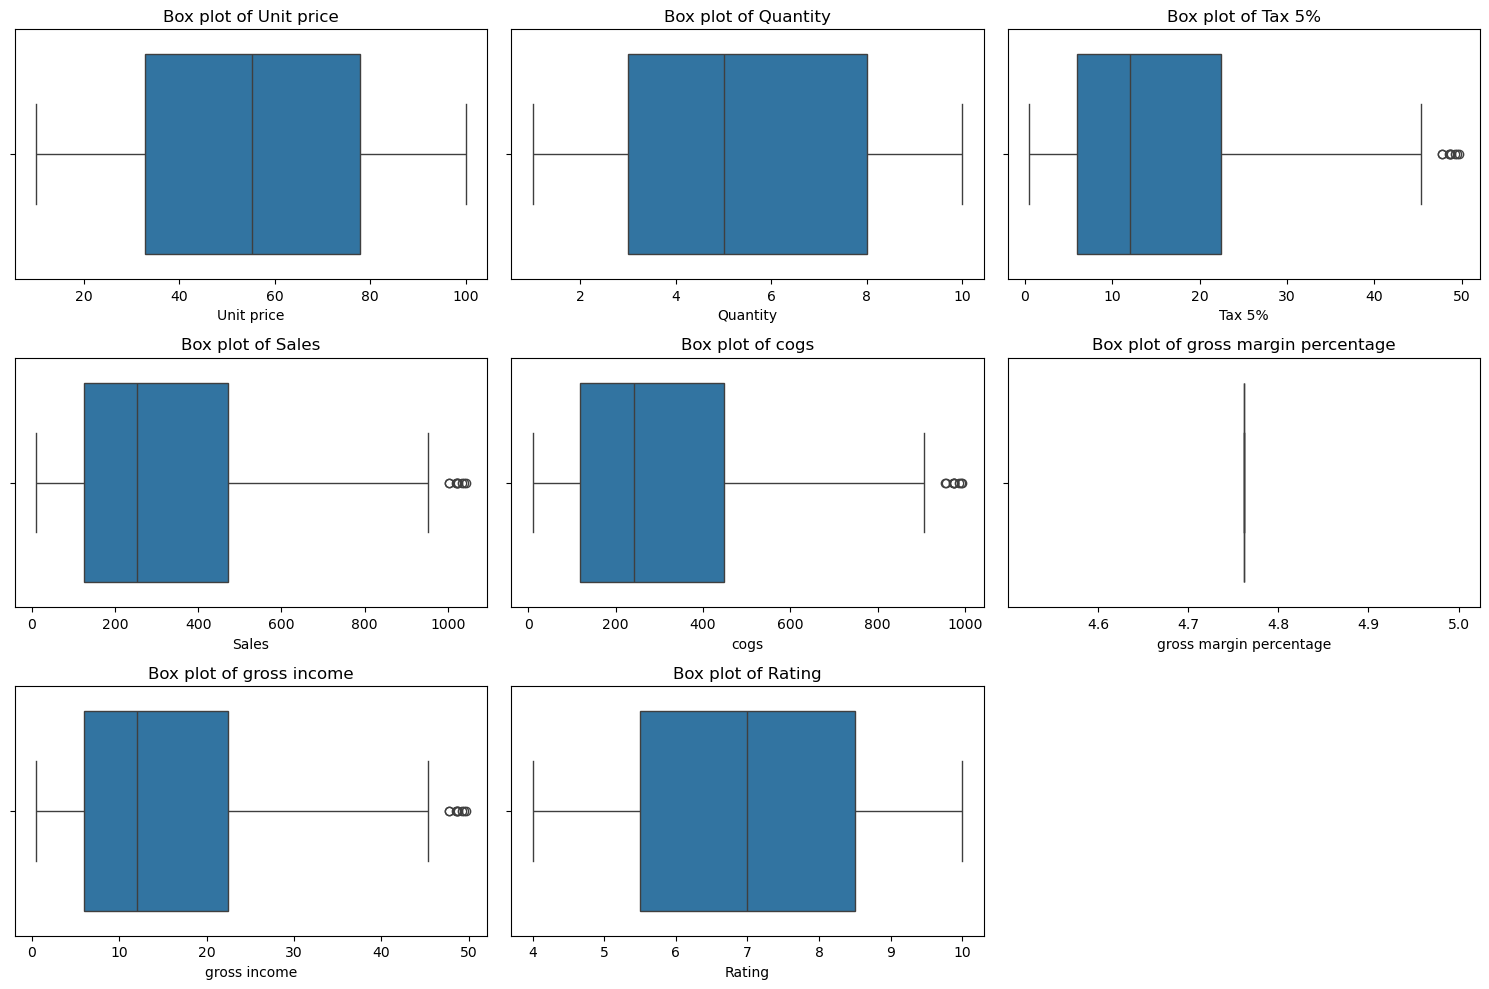

In [26]:
numerical = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

### WE CAN SEE THERE ARE SOME OUTLIERS IN SOME COLUMNS SUCH AS: TAX 5%, SALES, COGS, GROSS INCOME

In [28]:
outlier_cols = ['Tax 5%', 'Sales', 'cogs', 'gross income']

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

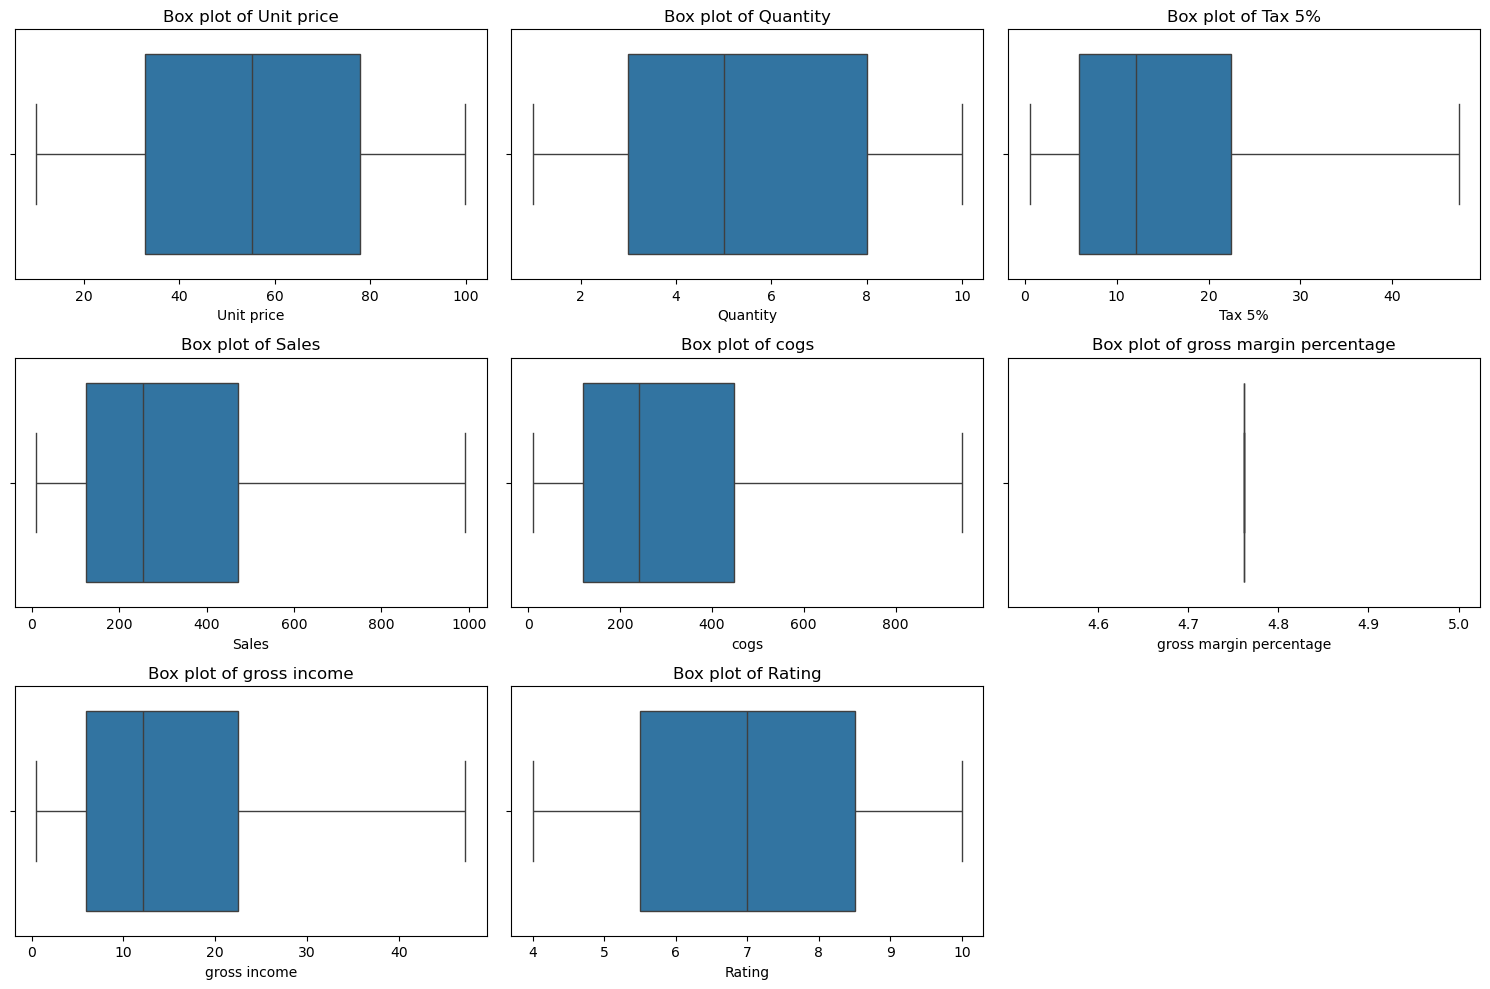

In [29]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [30]:
df["Date"] = pd.to_datetime(df["Date"], format="mixed")

In [31]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Sales                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [33]:
df['Time']

0       1:08:00 PM
1      10:29:00 AM
2       1:23:00 PM
3       8:33:00 PM
4      10:37:00 AM
          ...     
995     1:46:00 PM
996     5:16:00 PM
997     1:22:00 PM
998     3:33:00 PM
999     1:28:00 PM
Name: Time, Length: 1000, dtype: object

In [34]:
value_count_cols = ['Branch',	'City',	'Customer type',	'Gender'	,'Product line',	'Payment']  

for col in value_count_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'Branch':
Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

Value counts for 'City':
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Value counts for 'Customer type':
Customer type
Member    565
Normal    435
Name: count, dtype: int64

Value counts for 'Gender':
Gender
Female    571
Male      429
Name: count, dtype: int64

Value counts for 'Product line':
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Value counts for 'Payment':
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


In [35]:
unique_value_cols = ['Branch',	'City',	'Customer type',	'Gender'	,'Product line',	'Payment']  

for col in unique_value_cols:
    print(f"\n unique values of '{col}':")
    print(df[col].unique())


 unique values of 'Branch':
['Alex' 'Giza' 'Cairo']

 unique values of 'City':
['Yangon' 'Naypyitaw' 'Mandalay']

 unique values of 'Customer type':
['Member' 'Normal']

 unique values of 'Gender':
['Female' 'Male']

 unique values of 'Product line':
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']

 unique values of 'Payment':
['Ewallet' 'Cash' 'Credit card']


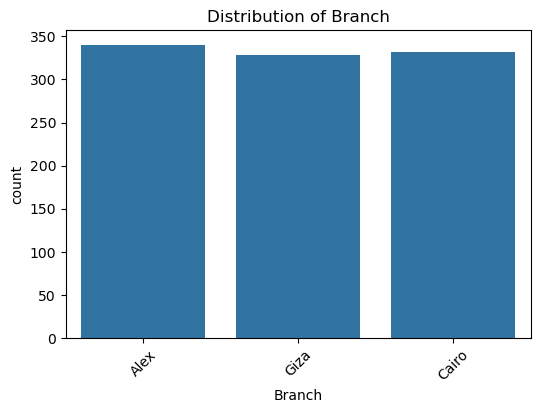

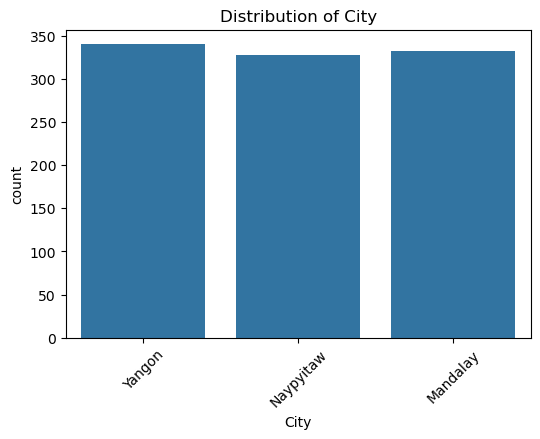

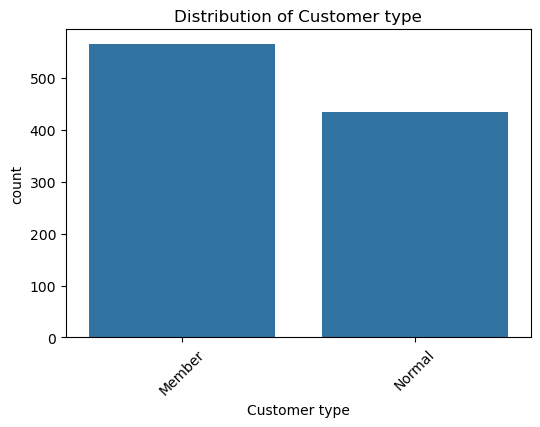

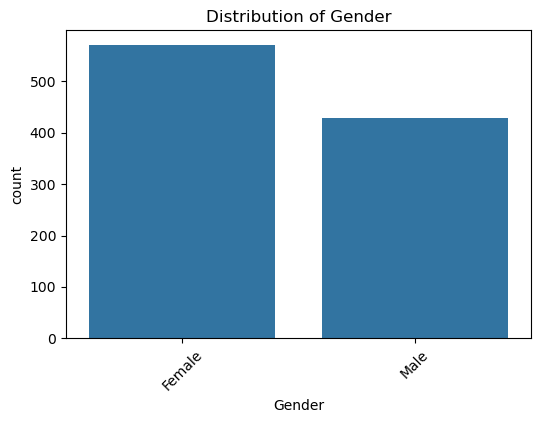

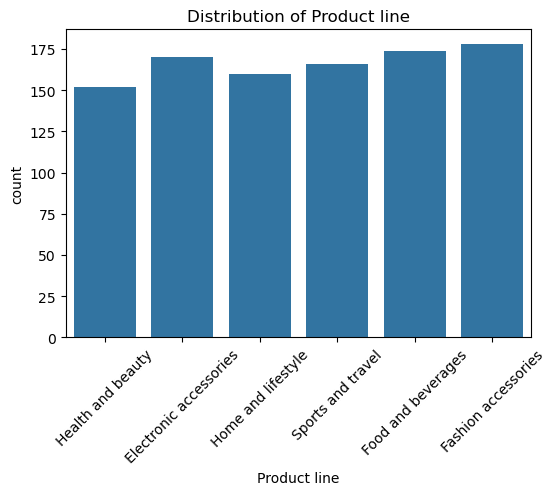

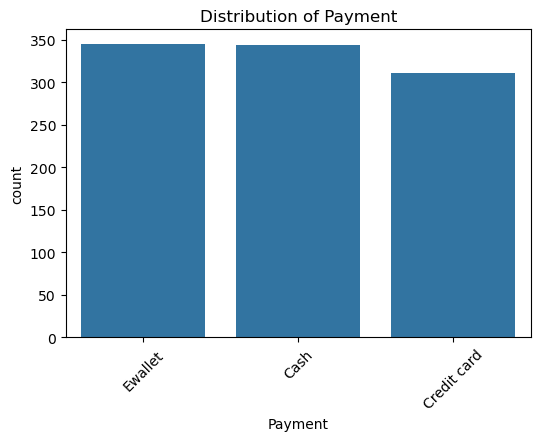

In [36]:
for col in ["Branch", "City", "Customer type", "Gender", "Product line", "Payment"]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


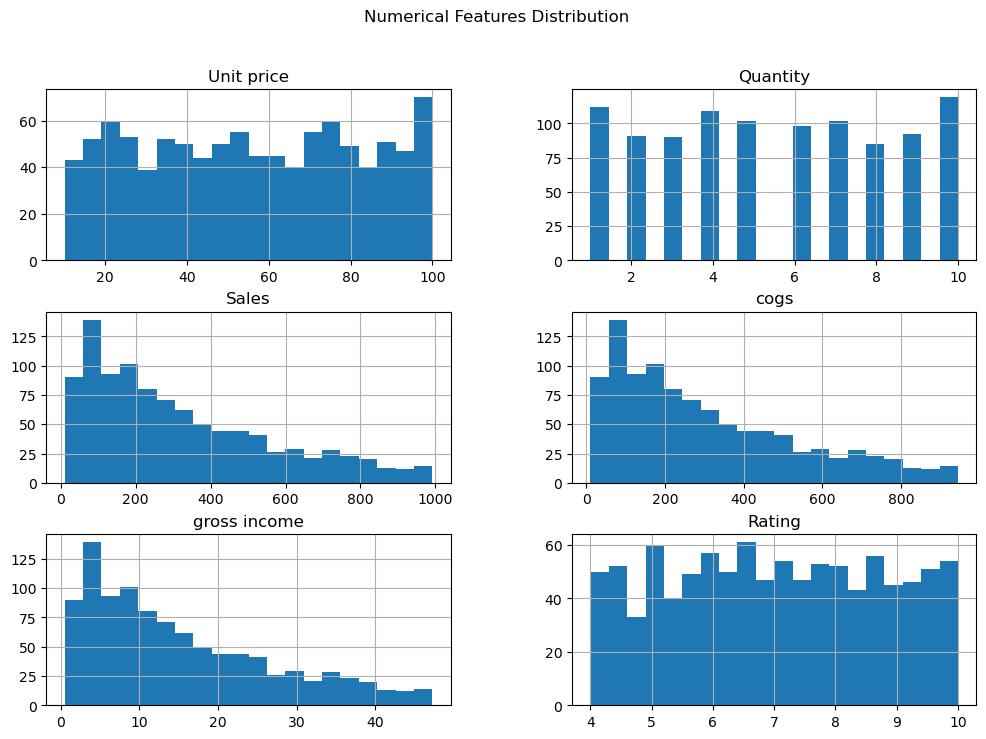

In [37]:
num_cols = ["Unit price", "Quantity", "Sales", "cogs", "gross income", "Rating"]
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Numerical Features Distribution")
plt.show()

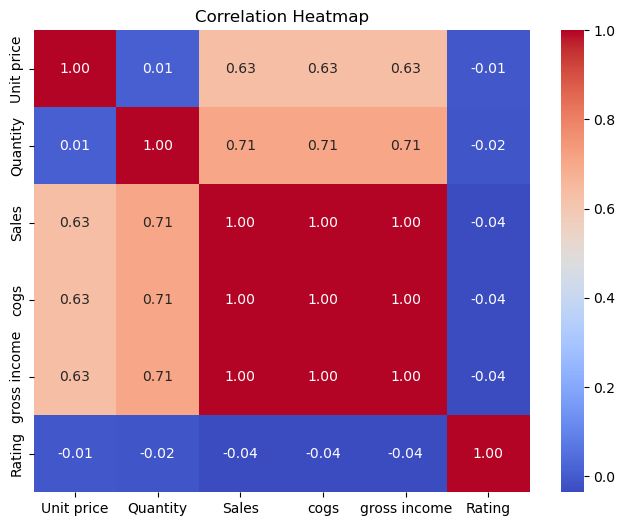

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

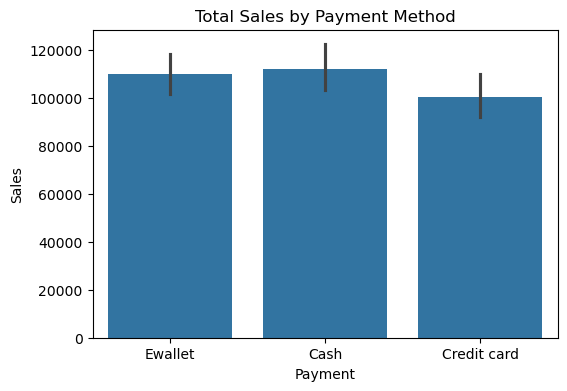

In [39]:
plt.figure(figsize=(6,4))
sns.barplot(x="Payment", y="Sales", data=df, estimator=sum)
plt.title("Total Sales by Payment Method")
plt.show()

In [40]:
sns.set(style="whitegrid")

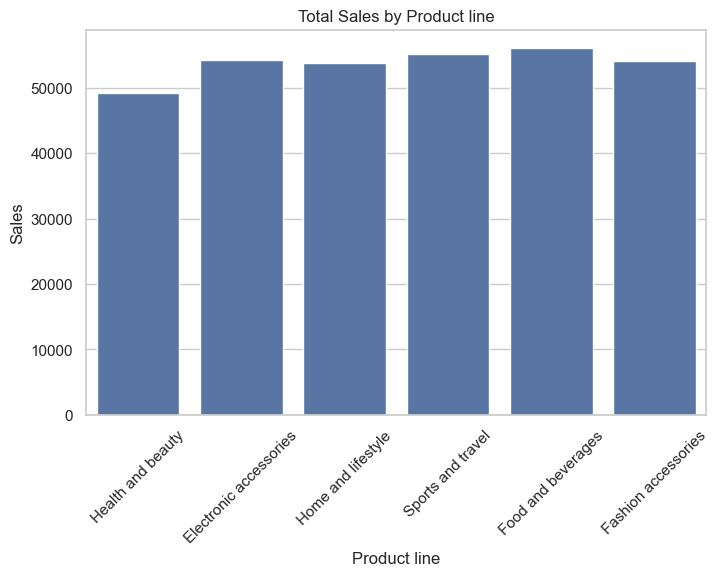

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(x="Product line", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Product line")
plt.xticks(rotation=45)
plt.show()

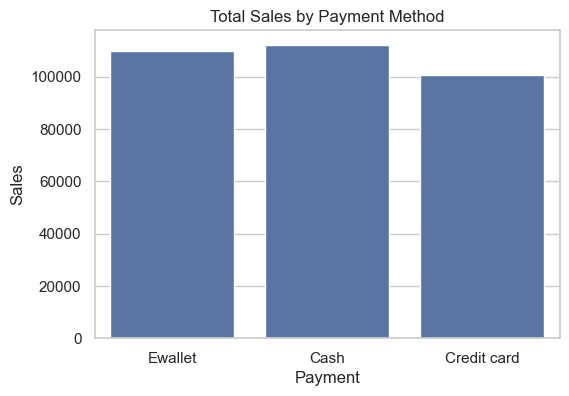

In [42]:
plt.figure(figsize=(6,4))
sns.barplot(x="Payment", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Payment Method")
plt.show()

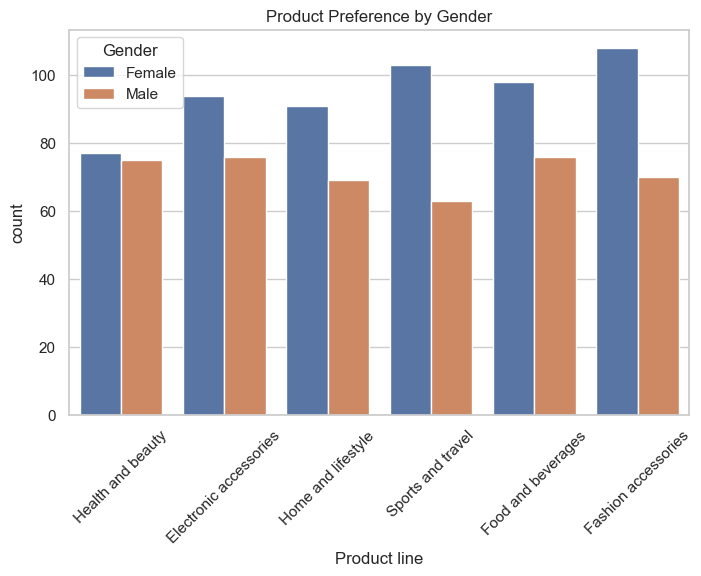

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(x="Product line", hue="Gender", data=df)
plt.title("Product Preference by Gender")
plt.xticks(rotation=45)
plt.show()

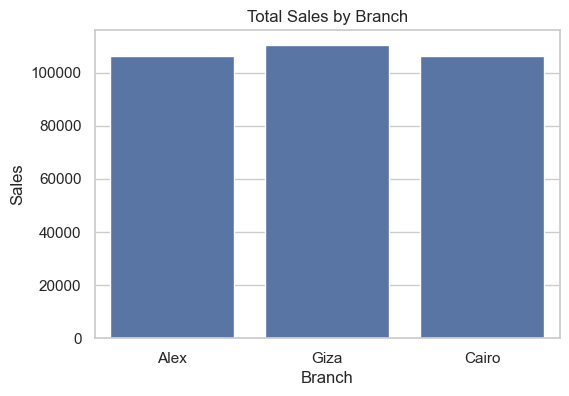

In [44]:
plt.figure(figsize=(6,4))
sns.barplot(x="Branch", y="Sales", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Branch")
plt.show()

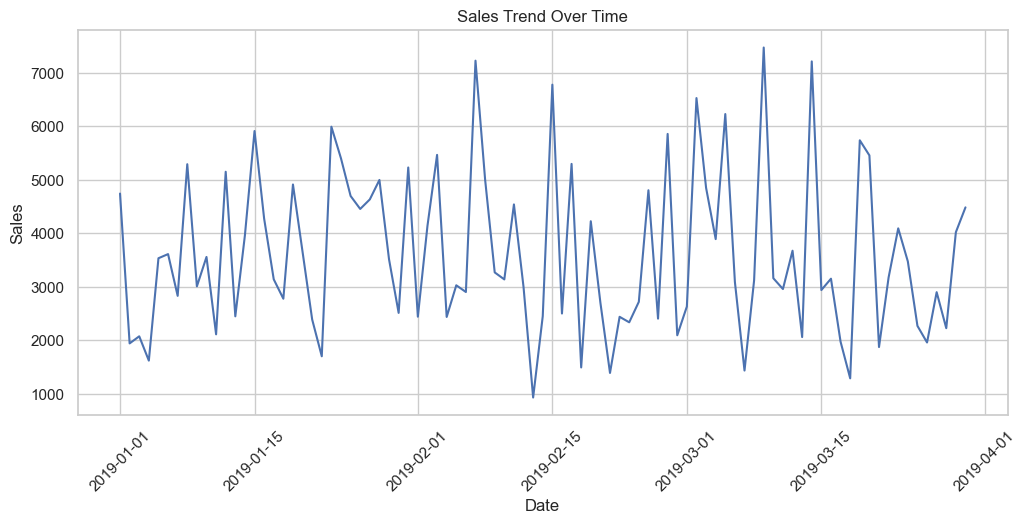

In [45]:
plt.figure(figsize=(12,5))
daily_sales = df.groupby("Date")["Sales"].sum().reset_index()
sns.lineplot(x="Date", y="Sales", data=daily_sales)
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()


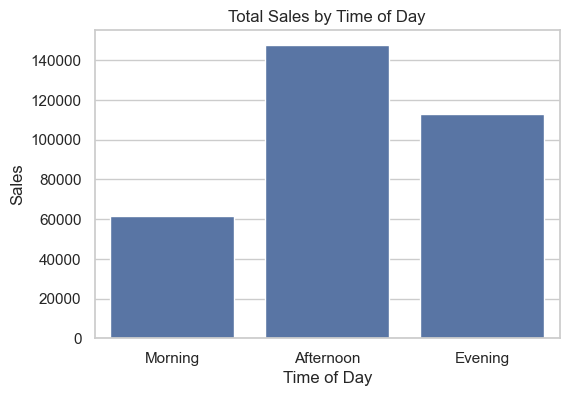

In [46]:
df["Time"] = pd.to_datetime(df["Time"], format="%I:%M:%S %p")

# Create Time of Day column
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    else:
        return "Evening"

df["Time of Day"] = df["Time"].dt.hour.apply(get_time_of_day)

plt.figure(figsize=(6,4))
sns.barplot(x="Time of Day", y="Sales", data=df, estimator=sum, ci=None,
            order=["Morning", "Afternoon", "Evening"])
plt.title("Total Sales by Time of Day")
plt.show()

## TRAINING AND EVALUATION

In [84]:
numerical

['Unit price',
 'Quantity',
 'Tax 5%',
 'Sales',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [86]:
X = df[numerical]
y = df['Sales']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 9.982237259009708e-14
RMSE: 1.2255890305928484e-13
R2 Score: 1.0
